# Random Forest Classification

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import pickle

import warnings
warnings.filterwarnings("ignore")

# Import data

In [2]:
import os
os.chdir("../../")
print(os.getcwd())

c:\Users\MSI11\Bimo\Data_Science\Project\Seminar\Portofolio


In [3]:
# Read dataset
df = pd.read_csv("./Modeling/data/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Preprocessing

## Get required data

In [4]:
# Get required data
df.drop(columns = ['User ID'], inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df.groupby(["Gender","Purchased"]).sum()

EstimatedSalary  Purchased
Gender Age                            
Female 18            198000          0
       19             47000          0
       20            223000          0
       21             84000          0
       22            145000          0
...                     ...        ...
Male   56            193000          2
       57            134000          2
       58            144000          1
       59            273000          2
       60            303000          5

[83 rows x 2 columns]

## Describe

In [ ]:
# Describe data
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Distribution

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

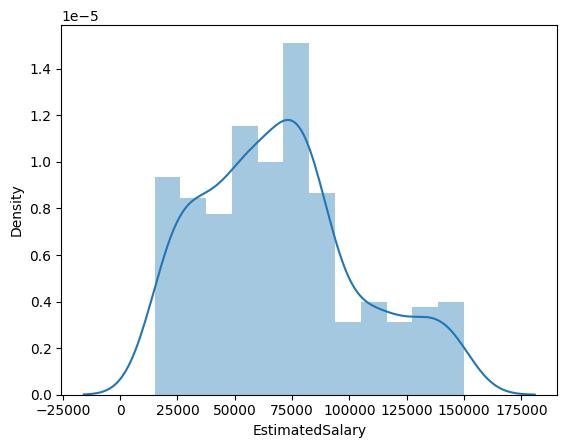

In [ ]:
# Salary distribution
sns.distplot(df['EstimatedSalary'])

## Label encoding

In [ ]:
# Label encoding
Oe = OrdinalEncoder()
df_net = df.copy()
df_net['Gender']= Oe.fit_transform(df_net[['Gender']])
Oe

OrdinalEncoder()

## Correlation matrix

In [ ]:
# Correlation matrix
df_net.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

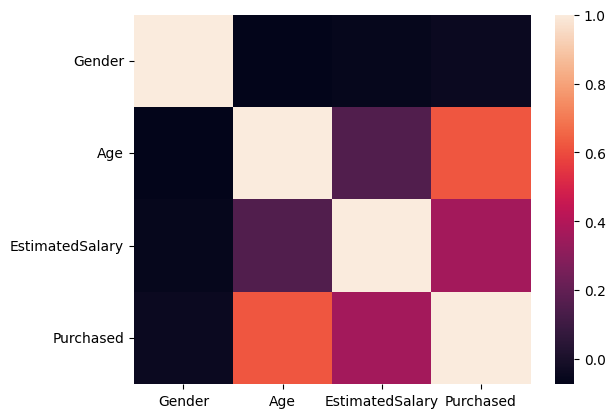

In [ ]:
sns.heatmap(df_net.corr())

## Relationship

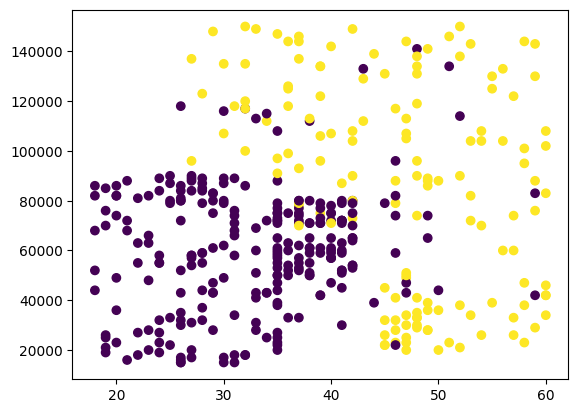

In [14]:
# Relationship between Age and Salary
plt.scatter(data=df,x='Age',y='EstimatedSalary',c='Purchased')

# Split data

## Independent/Dependent variables

In [11]:
# Split data into independent/dependent variables
X = df_net.iloc[:, :-1].values
y = df_net.iloc[:, -1].values

In [12]:
X

array([[1.0e+00, 1.9e+01, 1.9e+04],
       [1.0e+00, 3.5e+01, 2.0e+04],
       [0.0e+00, 2.6e+01, 4.3e+04],
       ...,
       [0.0e+00, 5.0e+01, 2.0e+04],
       [1.0e+00, 3.6e+01, 3.3e+04],
       [0.0e+00, 4.9e+01, 3.6e+04]])

## Train/Test sets

In [13]:
# Split dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

# Feature scaling

In [14]:
# Scale dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train model

In [15]:
# Train K-Nearest Neighbour model
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predict result / Score model

In [16]:
# Prediction
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


# Evaluate model

## Accuracy

In [17]:
# Accuracy
accuracy_score(y_test, y_pred)

0.88

## Classification report

In [18]:
# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        58
           1       0.83      0.90      0.86        42

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



## F1 score

In [19]:
# F1 score
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8636363636363636


## Confusion matrix

<Axes: >

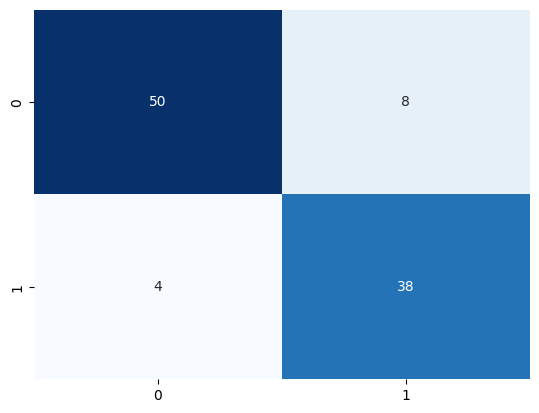

In [20]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

## Precision-Recall curve

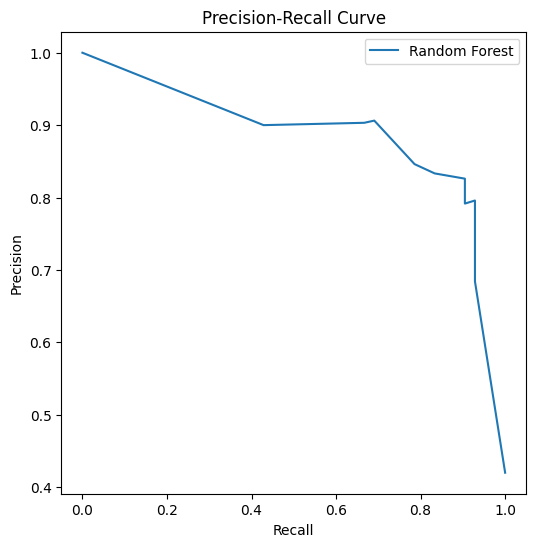

In [21]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Random Forest')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve')
ax.legend();

## AUC/ROC curve

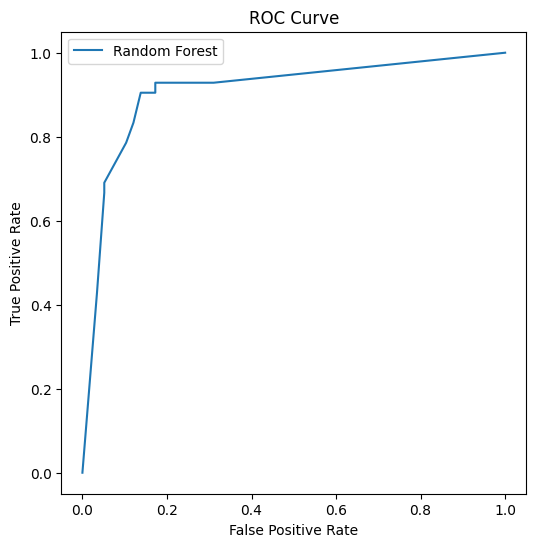

In [22]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Random Forest')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend();

# Check example

In [23]:
# Predict purchase with Age(30) and Salary(87000)
print(classifier.predict(sc.transform([[0,30, 87000]])))

[0]


# Export

In [24]:
sc.scale_

array([4.99988889e-01, 1.01966329e+01, 3.37375136e+04])

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
df.iloc[:,:-1].values

array([['Male', 19, 19000],
       ['Male', 35, 20000],
       ['Female', 26, 43000],
       ...,
       ['Female', 50, 20000],
       ['Male', 36, 33000],
       ['Female', 49, 36000]], dtype=object)

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('Label Encode',Oe,[0])
    ],
    remainder='passthrough'
)

preprocessor.fit(df.iloc[:,:-1].values)

ColumnTransformer(remainder='passthrough',
                  transformers=[('Label Encode', OrdinalEncoder(), [0])])

In [28]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('Standard Scaler',sc),
    ('Random Forest',classifier)
])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Label Encode',
                                                  OrdinalEncoder(), [0])])),
                ('Standard Scaler', StandardScaler()),
                ('Random Forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=10,
                                        random_state=0))])

In [29]:
pickle.dump(pipe, open('./Backend/model/ads/ads-0.1.0.pkl', 'wb'))

# Test Pipeline

In [30]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Label Encode',
                                                  OrdinalEncoder(), [0])])),
                ('Standard Scaler', StandardScaler()),
                ('Random Forest',
                 RandomForestClassifier(criterion='entropy', n_estimators=10,
                                        random_state=0))])

In [2]:
pipe.predict([['Male',19,20000000]])

NameError: name 'pipe' is not defined